In [11]:
%matplotlib inline
%env KERAS_BACKEND=tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, IntSlider, Button
from ipywidgets import interact_manual
# import sympy as sym
# from sympy import S,N
# import locale
# from sklearn.linear_model import LinearRegression
from keras.utils import np_utils #one hot encoding
from keras.models import Sequential #神經網路的框架keras.models
from keras.layers import Dense, Activation
from keras.layers import Flatten # 將資料展平
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta
from keras.models import model_from_json
from keras.datasets import mnist # mnist內 包含手寫測試資料

# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dropout

import matplotlib.image as mpimg #import image file
from sklearn.model_selection import train_test_split

env: KERAS_BACKEND=tensorflow


In [2]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()
print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)
# y_test0.shape

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


In [3]:
x_train = x_train0.reshape(x_train0.shape[0], -1)
x_test = x_test0.reshape(x_test0.shape[0], -1)
x_train -= x_train.min()
x_train = x_train/x_train.max()
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

print(x_train.max(), "\n", x_train.min(), "\n", y_test[0])

1.0 
 0.0 
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [13]:
y_train01 = np.ones_like(y_train0)
y_train01[y_train0%2==0] = 0


y_test_even_odd = np.ones_like(y_test0) # return 全部都是1的矩陣，shape跟y_test一樣
y_test_even_odd[y_test0%2==0] = 0

(array([4926.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5074.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

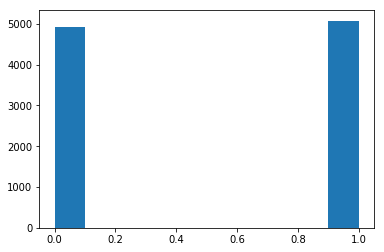

In [14]:
plt.hist(y_test_even_odd)

In [15]:
def plotNumber(idx):
    plt.imshow(x_train0[idx], 'Greys')
    plt.title("Number: %d\n Evev/odd label: %d" %(y_train0[idx], y_train01[idx]))
    plt.axis('off')
interact(plotNumber, idx=IntSlider(value=0, description='Data Index', min=0, max=x_train0.shape[0]-1))

interactive(children=(IntSlider(value=0, description='Data Index', max=59999), Output()), _dom_classes=('widge…

<function __main__.plotNumber(idx)>